In [9]:
!pip install -r ../requirements.txt

In [10]:
# Uncomment the lines below to download the data from the Zenodo repositories and 
# unzip it in the data folder

# %cd ../data

# !wget https://zenodo.org/record/7576814/files/source.zip?download=1 -O source.zip
# !unzip source.zip
# !rm source.zip
# !mv source/WEIGHTS .
# !rm -r source

# !wget https://zenodo.org/records/15120875/files/data.zip?download=1 -O data.zip
# !unzip data.zip
# !rm data.zip

# %cd ../src

In [1]:
from dataset import SolarPanelDataset
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:

data_path = Path("../data")

xlsx_path = data_path / "solar_panel_data_madagascar.xlsx"
img_path = data_path / "img"
seg_weights_path = data_path / "WEIGHTS" / "model_bdappv_seg.pth"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
dataset = SolarPanelDataset(img_path, xlsx_path, "cls", "all", "train", [1, 0, 0], seed=0)

In [24]:
mask = dataset[5701][1]
print(torch.sum(mask) / torch.prod(torch.Tensor(list(mask.shape))))

tensor(0.0223)


In [ ]:
model = torch.load(seg_weights_path, weights_only=False, map_location=device)
model.to(device)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
img, mask = dataset[900]

threshold = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

predicted = model.forward(img.unsqueeze(0).to(device))

prediction = predicted['out']
prediction = (prediction - torch.min(prediction)) / (torch.max(prediction) - torch.min(prediction) + 0.000000001)
binary_output = (prediction >= threshold).long().squeeze(1).detach().cpu().numpy()[0]

TypeError: Invalid shape () for image data

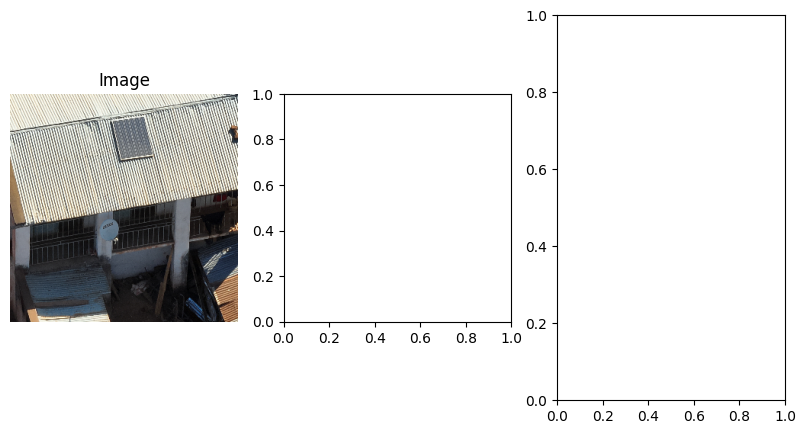

In [4]:
img, mask = dataset[5701]
binary_output = img

img_np = img.permute(1, 2, 0).numpy()
rescaled_img = (img_np - np.min(img_np, axis=(0, 1))) / (np.max(img_np, axis=(0, 1)) - np.min(img_np, axis=(0, 1)))
mask_np = mask.squeeze().numpy()
binary_output_np = binary_output.squeeze()

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(rescaled_img)
axes[0].axis("off")
axes[0].set_title("Image")

axes[1].imshow(mask_np, cmap="gray")
axes[1].axis("off")
axes[1].set_title("Ground Truth")

axes[2].imshow(binary_output_np, cmap="gray")
axes[2].axis("off")
axes[2].set_title("Prediction")

plt.show()

In [5]:
print(mask)

tensor(1)


In [9]:
import metrics

gt = torch.Tensor([0, 0, 1, 0, 1])
prediction = torch.Tensor([1,0,1, 0, 1])
print(metrics.recall(gt, prediction))

tensor(0.4000)


In [10]:
img.shape

torch.Size([3, 299, 299])